# 템플릿 설명


- 수행일 : 2024년 05월 28일
- 수행자 : 이정훈

## 오늘의 주제

- keras API
- 학습 모니터링 시각화
- 모델 학습 과정의 시각적 이해

## 오늘의 목표

- 모델 학습의 전 과정을 살펴보고, 각 **워크플로우(API)를 사용**할 수 있습니다.
- 여러 방식 중 **적합한 방식을 선택할 수 있고, 각 방식을 커스텀하여 사용**할 수 있습니다.
- **모델 훈련과 평가의 차이**를 이해하고, 각각의 루프를 다르게 구성할 수 있습니다.
- **하이퍼 파라미터 변경 과정을 시각적으로 확인하고, 이해**합니다.


---

# Keras API for Modeling

> 7장을 학습하고, sequential, functional, subclassing 방식으로 모델 학습의 프로세스를 구축합니다.<br>이후 아래 자료와 질문을 토대로 모델의 학습과정에서 일어나는 내부 동작을 이해합니다.


## 교재 실습코드

In [1]:
### Packages and module import
from tensorflow import keras
from tensorflow.keras import layers

/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Sequential model (P245)

- Sequential의 경우 List의 형태로 간단하게 만들거나, .add() 를 통해 쌓는 방식

In [2]:
# List의 형태 활용
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [3]:
# .add() 를 활용
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

- 모델 호출 전까지 가중치를 가지지 않음

In [4]:
# 모델 호출 후 가중치 확인
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.16934848,  0.1456418 ,  0.28987455,  0.19900417, -0.15851872,
         -0.1272348 ,  0.19887796,  0.09325594, -0.22591265, -0.28997836,
          0.08429158, -0.13834794, -0.06382997, -0.00468275, -0.0063554 ,
         -0.2208825 ,  0.2850721 , -0.17349704, -0.15436344, -0.22752416,
          0.19500408,  0.0532127 ,  0.20717633, -0.29654446,  0.0091615 ,
          0.04700211, -0.04436782,  0.03056672, -0.24949533,  0.25192422,
          0.05917519, -0.13630205, -0.0157204 ,  0.01133224,  0.02117571,
          0.12723473,  0.2536515 ,  0.27486813,  0.19622412,  0.12121749,
         -0.08870819,  0.20112568,  0.2931564 , -0.0852609 , -0.25934684,
          0.09092224, -0.04159975,  0.12806037,  0.08383438, -0.12212418,
          0.28558362, -0.04339886,  0.21038425, -0.22575939, -0.06589085,
          0.01595429,  0.0034216 , -0.11962266, -0.09518075,  0.28063077,
          0.05021131,  0.05835092,  0.27435

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- `name` keyword argument 사용을 통한 이름 지정

In [6]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Model input size를 미리 지정

In [7]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,))) # 헤당 부분을 통해 지정할 수 있다.
model.add(layers.Dense(64, activation="relu"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# 위 모델에 10 Unit을 가지는 레이어 추가
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Functional API model (P249)

- 두 개의 Dense층을 갖는 functional API Model

In [9]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs) # keyword arguments로 in, out을 지정해줘야 한다. 

In [10]:
# 입력 인스턴스 모양 확인
inputs = keras.Input(shape=(3,), name="my_input")
inputs.shape

TensorShape([None, 3])

In [11]:
inputs.dtype # 형태를 확인

tf.float32

In [12]:
# 첫 번째 층 정보 확인
features = layers.Dense(64, activation="relu")(inputs)

In [13]:
features.shape

TensorShape([None, 64])

In [14]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary() # 함수형 API를 통해 쌓은 모델의 요약 정보 확인 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_8 (Dense)             (None, 64)                256       
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 다중 입력/다중 출력 모델

##### Define Model

In [15]:
# Const settings
vocabulary_size = 10000
num_tags = 100
num_departments = 4

# Multiple Inputs 
title = keras.Input(shape=(vocabulary_size, ), name="title")
text_body = keras.Input(shape=(vocabulary_size, ), name="text_body")
tags = keras.Input(shape=(num_tags, ), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

# Multiple Outputs 
priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", 
    name="department")(features)

# Insert multiple In/out using list
model =  keras.Model(inputs=[title, text_body, tags],
                     outputs=[priority, department])

##### Training Model

In [16]:
import numpy as np

num_samples = 1200

# 학습을 위한 무작위 데이터 생성
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# output 데이터 무작위 생성
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

# 모델 셋팅
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
# 모델 훈련
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)

# 모델 평가코드
model.evaluate([title_data, text_body_data, tags_data],
          [priority_data, department_data])

# 모델 예측 코드
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data],)


38/38 [==============================] - 0s 1ms/step


###### 입/출력을 딕셔너리로 전달하여 훈련

In [17]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

38/38 [==============================] - 0s 2ms/step


> 데이터의 구조가 복잡할 때 유용하다.

##### 장점 : 층 연결 구조를 활용하여 시각화 가능

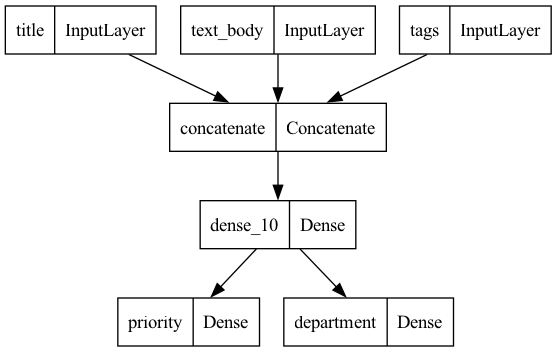

In [18]:
# !pip install pydot graphviz
keras.utils.plot_model(model, "ticket_classifier.png")

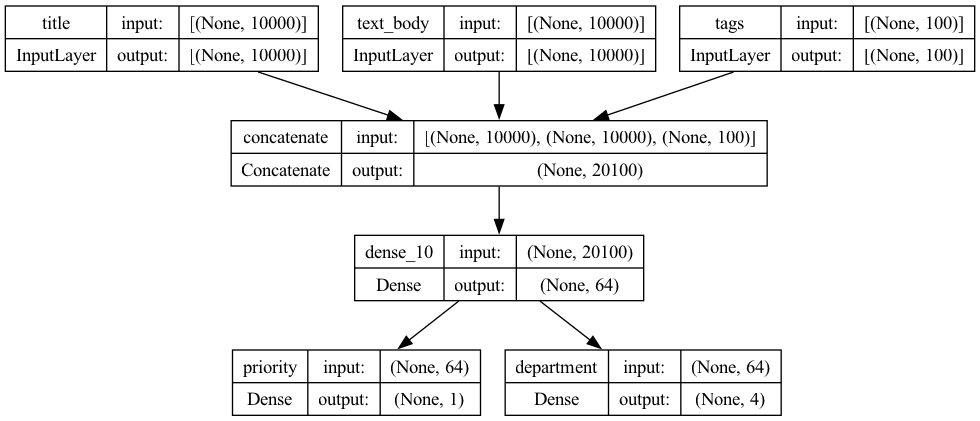

In [19]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

In [20]:
# 레이어 정보
model.layers 

In [25]:
# 개별적인 레이어 입출력 정보 확인
display(model.layers[3].input, "---", model.layers[3].output )

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

'---'

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

In [26]:
# 중간층의 출력을 재사용
features = model.layers[4].output

difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])


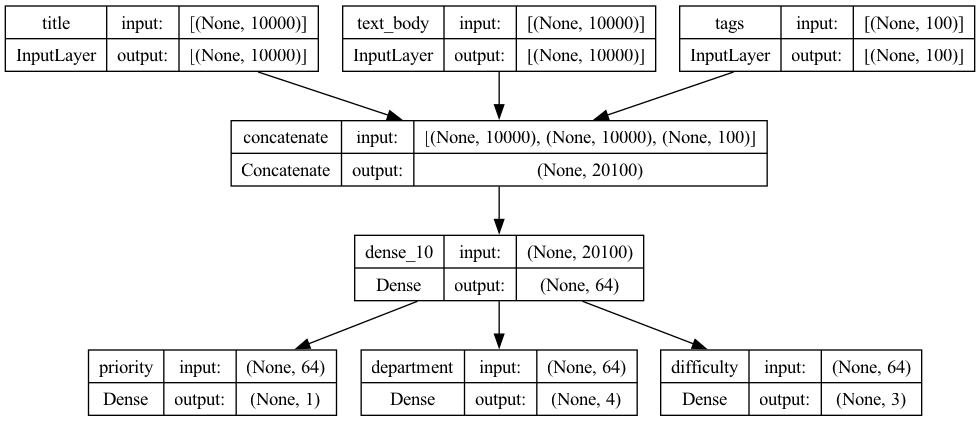

In [27]:
keras.utils.plot_model(new_model, "stacked_ticket_classifier.png", show_shapes=True)

### Subclassing model (P256)

- 이전 예제를 다시 서브 클래싱으로 구현하기

In [34]:
class CustomerTicketModel(keras.Model):
    # layer 정의
    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    
    # forward pass 정의 - 인스턴스 생성 시 실행, 이 때 가중치가 생성됨
    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [35]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [36]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

38/38 [==============================] - 0s 2ms/step


### 혼합 모델 (P259)

#### 서브클래싱 포함하는 Functional Model

In [ ]:
# 분류모델의 마지막 layer
class Classifier(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        # 분기점을 만들어서, 마지막에 적절한 activation을 적용
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

#### 함수형 모델을 포함하는 서브클래싱

In [ ]:
# 함수형으로 이진분류기 정의
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)


class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        
        # 정의 된 이진분류기를 subclassing의 속성값으로 불러옴
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### 내장된 훈련 루프와 평가 루프 사용하기

**표준 워크플로: `compile()`, `fit()`, `evaluate()`, `predict()`**

In [41]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2976 - accuracy: 0.9118 - val_loss: 0.1535 - val_accuracy: 0.9563
Epoch 2/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1643 - accuracy: 0.9538 - val_loss: 0.1201 - val_accuracy: 0.9690
Epoch 3/3
313/313 [==============================] - 0s 539us/step


#### 사용자 정의 지표 만들기

**`Metric` 클래스를 상속하여 사용자 정의 지표 구현하기**

In [42]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric): ## 상속해서 정의

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [43]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()]) # 정의 한 것을 호출
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2935 - accuracy: 0.9126 - rmse: 7.1839 - val_loss: 0.1468 - val_accuracy: 0.9587 - val_rmse: 7.3628
Epoch 2/3
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1657 - accuracy: 0.9542 - rmse: 7.3541 - val_loss: 0.1348 - val_accuracy: 0.9639 - val_rmse: 7.4038
Epoch 3/3
313/313 [==============================] - 0s 673us/step - loss: 0.1091 - accuracy: 0.9722 - rmse: 7.4399


#### 콜백 사용하기

##### EarlyStopping 콜백과 ModelCheckpoint 콜백

**`fit()` 메서드에서 `callbacks` 매개변수 사용하기**

In [ ]:
# 콜백을 만들어서, fit()에 적용, 해결하지 못함
# ValueError: The following argument(s) are not supported with the native Keras format: ['options'] 에러
# 일과 후에 다시 해봐야 할 것 같음

callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

In [ ]:
model = keras.models.load_model("checkpoint_path.keras")

### 사용자 정의 콜백 만들기

**`Callback` 클래스를 상속하여 사용자 정의 콜백 만들기**

In [ ]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2908 - accuracy: 0.9130 - val_loss: 0.1572 - val_accuracy: 0.9542
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1645 - accuracy: 0.9536 - val_loss: 0.1270 - val_accuracy: 0.9666
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1366 - accuracy: 0.9633 - val_loss: 0.1226 - val_accuracy: 0.9684
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1263 - accuracy: 0.9669 - val_loss: 0.1037 - val_accuracy: 0.9737
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1171 - accuracy: 0.9706 - val_loss: 0.1204 - val_accuracy: 0.9738
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1128 - accuracy: 0.9732 - val_loss: 0.1123 - val_accuracy: 0.9755
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1056 - accuracy: 0.9747 - val_loss: 0.1181 - val_accuracy:

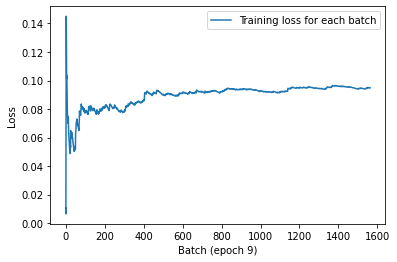

In [ ]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### 텐서보드를 사용한 모니터링과 시각화

In [ ]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="./tb_logs",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2929 - accuracy: 0.9112 - val_loss: 0.1481 - val_accuracy: 0.9574
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1626 - accuracy: 0.9539 - val_loss: 0.1318 - val_accuracy: 0.9666
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1377 - accuracy: 0.9626 - val_loss: 0.1289 - val_accuracy: 0.9670
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1230 - accuracy: 0.9677 - val_loss: 0.1185 - val_accuracy: 0.9731
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1152 - accuracy: 0.9720 - val_loss: 0.1108 - val_accuracy: 0.9744
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1059 - accuracy: 0.9740 - val_loss: 0.1156 - val_accuracy: 0.9763
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1049 - accuracy: 0.9757 - val_loss: 0.1089 - val_accuracy:

### 사용자 정의 훈련, 평가 루프 만들기

#### 측정 지표의 저수준 사용법

In [45]:
metric = keras.metrics.SparseCategoricalAccuracy() # 직접 metric을 불러옴
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"결과: {current_result:.2f}")

결과: 1.00


In [46]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"평균 지표: {mean_tracker.result():.2f}")

평균 지표: 2.00


#### 완전한 훈련과 평가 루프

**단계별 훈련 루프 작성하기: 훈련 스텝 함수**

In [47]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

**단계별 훈련 루프 작성하기: 지표 재설정**

In [ ]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**단계별 훈련 루프 작성하기: 훈련 루프 자체**

In [ ]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"{epoch}번째 에포크 결과")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

0번째 에포크 결과
...sparse_categorical_accuracy: 0.9145
...loss: 0.2892
1번째 에포크 결과
...sparse_categorical_accuracy: 0.9536
...loss: 0.1660
2번째 에포크 결과
...sparse_categorical_accuracy: 0.9632
...loss: 0.1395


**단계별 평가 루프 작성하기**

In [ ]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

평가 결과:
...val_sparse_categorical_accuracy: 0.9662
...val_loss: 0.1357


#### tf.function로 성능 높이기

**평가 스텝 함수에 `@tf.function` 데코레이터 추가하기**

In [ ]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

평가 결과:
...val_sparse_categorical_accuracy: 0.9662
...val_loss: 0.1357


### fit() 메서드를 사용자 정의 훈련 루프로 활용하기

**`fit()`이 사용할 사용자 정의 훈련 스텝 구현하기**

In [ ]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property # 개별 엘리먼트들을 접근하게 해 주는 데코레이터 
    def metrics(self):
        return [loss_tracker]

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2911
Epoch 2/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1665
Epoch 3/3
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1376


In [ ]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2910 - sparse_categorical_accuracy: 0.9138
Epoch 2/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1656 - sparse_categorical_accuracy: 0.9525
Epoch 3/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1393 - sparse_categorical_accuracy: 0.9624


## 확인사항

### 1. kerasAPI를 이해합니다.
#### 모델을 구성합니다. 
이때 sequential, functional, subclassing 세 방법을 모두 사용합니다.
- 7장을 읽어보고, kears의 세 가지 모델 구성 방식을 숙지합니다. 각 API별 차이를 이해합니다.
- 각각의 api를 사용한 예제를 찾아보고, 어떤 경우에 사용할 수 있는지 이해합니다.


#### Sequential과 functional의 차이를 설명할 수 있습니다.
##### (미션)sequential로는 구현이 불가능한 상황을 찾아봅니다.
<span style="background-color:#C0FFFF; color:green">- (답을 여기) : for / 재귀로 Layer가 쌓일 경우 (반복문)</span>


#### Functional과 Sub classing의 차이를 설명할 수 있습니다.
##### (미션)Functional로 구현하는 것 보다 sub classing으로 구현하는 것이 유리한 사례를 찾아봅니다.
<span style="background-color:#C0FFFF; color:green">- (답을 여기) : low-level단까지 모든 조건들을 Customize하고 싶을 때 유용하다.</span>



### 2. 모델학습 후 평가하는 여러가지 방법을 이해합니다.
- [Evaluating Machine Learning Models - Made With ML](https://madewithml.com/courses/mlops/evaluation/)


- 모델의 성능을 평가하기 위한 방법은 어떤 것들이 있는지 확인합니다. 또 이때 고민해야 할 여러 관점을 살펴봅니다.



- 모델을 학습하고  다른 모델과 성능을 비교할 때 어떤 관점에서 비교해야 하는지 확인합니다.


---

# 조별 특별 미션 - 1조

진행 내용을 정리하지 못했습니다.

## 사용자 정의 지표를 사용하는 모델 (수행 산출물)

In [30]:
# 진행 내용을 정리하지 못했습니다.

## 사용자 정의 콜백을 사용하는 모델 (수행 산출물)

In [31]:
# 진행 내용을 정리하지 못했습니다.


---

# Playground - 1조


## Checklist, 체크해야 할 항목


- 1. 어떤 기준으로 모델을 학습할 것인지 선택합니다.
- (Baseline - 기준이 될 **조건** 정의/명세)
    - 다같이 정하기
    - 재현님 링크 참고해서 베이스라인 잡으면 됨

- 2. features에서 두 그룹을 확실히 나눌 수 있는 조합과, 나누지 못하는 조합을 찾아봅니다.
    - 한명이 실험 (2^6) = 64-1 = 63개의 경우의 수
    리스트업 하고나서 결과 비교 후 "확실히 나눌 수 있는 조합과, 나누지 못하는 조합"

- 3. 하이퍼 파라미터를 수정해보고 다음을 살펴봅니다.
    - 3-1. 레이어
    - 3-2. LR
    - 3-3. Activation


- 레이어:
    - 레이어가 깊어질수록 어떤 특징이 있는지 살펴봅니다.
    - 레이어가 넓어질수록 어떤 특징이 있는지 살펴봅니다.
    - 왜 레이어를 변경할때마다 패턴이 다르게 시작하는지 생각해봅니다



- learning rate
    - learning rate가 높아질 때 어떤 특징이 있는지 살펴봅니다.
    - learning rate가 낮아질 때 어떤 특징이 있는지 살펴봅니다.



- activation function
    - activation function이 달라질 때 어떤 특징이 있는지 살펴봅니다.
    - 특히 tanh, sigmoid는 함수의 모양이 비슷한데 수렴속도가 다른 이유를 설명해봅시다.

각 조는 위의 체크 항목에 따라, 다음의 8개의 실험 중 하나를 수행하게 됩니다.<br>
    - 실험은 비교실험입니다<br>
    - **각 실험의 과정과 결과에 대한 설명을 5분 내외로 준비해주세요**
- [A Neural Network Playground (tensorflow.org)](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=3,2&seed=0.80809&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)
    - 최적의 조합을 찾아보세요! 여러 조합을 확인하여, 달라지는 부분을 분석해봅시다.
        - (2조) Classification - data type 1
        - (4조) Classification - data type 4
        - (1조) <span style="background-color:#C0FFFF; color:green"> Regression - data type 2 </span>
- [Deep Learning Playground](https://datasciencegt-dlp.com/img-models)
    - 기준 모델과, 비교 포인트를 가진 모델들을 제작하여 차이를 확인해봅시다.
        - (5조) **Tabular Data : Optimizer / batch size**
        - (담당조) Image Data : Activation / Dropout rate
        - (담당조) Image Data : Layer 의 너비가 달라지는 경우
        - (7조) Image Data : Layer의 구성이 달라지는 경우 1
            - 레이어 모듈에 변화가 있는 경우
            - Conv - Maxpool // Conv - Conv - Maxpool
        - (담당조) Image Data :Layer의 구성이 달라지는 경우 2
            - 레이어 깊이에 변화가 있는 경우
            - Conv-maxpool을 한번 반복하는 경우 // Conv-maxpool을 여러 번 반복하는 경우


## Regression - data type 2 모의 실험 내용 정리

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-gauss&learningRate=0.03&regularizationRate=0&noise=0&networkShape=3,2&seed=0.90177&showTestData=false&discretize=false&percTrainData=70&x=false&y=false&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=regression&initZero=false&hideText=false

- 산출물 : https://www.notion.so/modulabs/0528_Playground-65020511c73a44faac7a9d21b1acedb0?pvs=4

## 조별 발표 기록내용

- 이얼 그룹 : 엑셀로 실험관리를 진행한 내용을 공유하면서 좋은 인사이트를 공유해줬었음.
- 민욱님 그룹 : 자료의 취합이 되지않아, 민욱님이 하신 부분에 대해서만 공유가 되었음.
- 하나의 수식으로 모든 것을 표현할 수 있다는 레퍼런스를 소개해주심
- 나경님 그룹 : Activation 변경해가면서 진행 
- 성연님 그룹 : 세션의 한계로, Playground를 대체해서 진행함
    layer 너비 증가에 따라, 빠른 수렴이 된다.
    conv filter 변경하고나서 layer 너비 증가해도 같은 경향성을 확인

- 경규님 그룹 : conv, max-pool 변경에 따라 경향성 확인, MNIST를 사용

---

# 오늘의 회고

- 진행하는데에 시간이 촉박하다는 것을 느꼈어서, 나름대로 계획적으로 진행했었지만, 오늘도 여전히 시간이 부족하였음.
- 인공신경망의 여러 변인들에 대해서 조건 변경 시 영향성에 대해, 실험과 여러 조 대표들의 발표를 통해 확인할 수 있었다.